In [162]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

Sea $\Omega = \{(x_0, f(x_0)), (x_1, f(x_1)), (x_2, f(x_2))\}$ el polinomio de interpolación de segundo grado. Entonces, podemos rescribir el polinomio como:
$$ 
    p(x) = (\frac{x-x_1}{x_0-x_1})(\frac{x-x_1}{x_0-x_2})f(x_0) +
    (\frac{x-x_0}{x_1-x_0})(\frac{x-x_2}{x_1-x_2})f(x_0) +
    (\frac{x-x_0}{x_2-x_0})(\frac{x-x_1}{x_2-x_1})f(x_0) 
$$ 
Entonces:
$$
    p'(x) = \frac{2x-x_2-x_1}{(x_0-x_1)(x_0-x_2)}f(x_0) +
    \frac{2x-x_2-x_0}{(x_1-x_0)(x_1-x_2)}f(x_1) +
    \frac{2x-x_1-x_0}{(x_2-x_0)(x_2-x_1)}f(x_2)
$$  

Asumiendo equidistancia:

$$\begin{aligned}
    f'(x) &\cong    \frac{2x-x-2h-x-h}{(x-x-h)(x-x-2h)}f(x) +
                    \frac{2x-x-2h-x}{(x+h-x)(x+h-x-2h)}f(x+h) +
                    \frac{2x-x-h-x}{(x+2h-x)(x+2h-x-h)}f(x+2h)\\

          &\cong    \frac{-3h}{2h^2}f(x) +
                    \frac{-2h}{-h^2}f(x+h) +
                    \frac{-h}{2h^2}f(x+2h)\\
          
          &\cong    \frac{1}{2h}(-3f(x)+4f(x+h)-f(x+2h))
\end{aligned}$$

In [163]:
def DerivadaProgresiva (f, x, h=0.01):

    return ((2*h)**-1)*((-3*f(x)) + (abs(4*f(x+h))) - (f(x+2*h)))

def CentralDerivative(f,x,h=0.01):

  d = 0.

  if h != 0:
    d = (f(x+h) - f(x-h))/(2*h)

  return d


In [164]:
def tangente (x):
    return np.sqrt(np.tan(x))

def derivada_tangente (x):
    return (1/((np.cos(x)**2))*(1/(2*(np.sqrt(np.tan(x))))))

In [165]:
x = np.linspace(0.1, 1.1, 25)

In [166]:
dif_progresiva = DerivadaProgresiva(tangente, x)
dif_central = CentralDerivative(tangente, x)
dif_real = derivada_tangente(x)

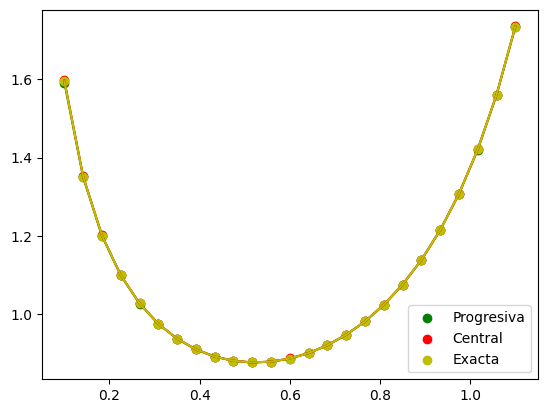

In [167]:

plt.scatter(x, dif_progresiva, label='Progresiva', color='g')
plt.scatter(x, dif_central, label='Central', color='r')
plt.scatter(x, dif_real, label='Exacta', color='y')
plt.plot(x, dif_progresiva, color='g')
plt.plot(x, dif_central, color='r')
plt.plot(x, dif_real, color='y')
plt.legend()

In [168]:
def diferencia (dr,d, f, x):
    return abs(dr(x) - d(f, x))

In [169]:
error_progresiva = diferencia(derivada_tangente, DerivadaProgresiva, tangente, x)
error_central = diferencia(derivada_tangente, CentralDerivative, tangente, x)

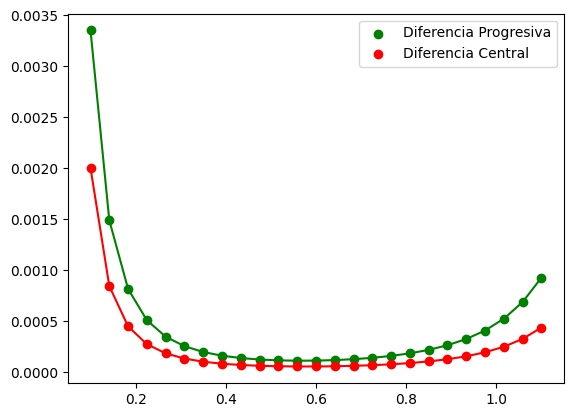

In [170]:
plt.scatter(x, error_progresiva, label='Diferencia Progresiva', color='g')
plt.scatter(x, error_central, label='Diferencia Central', color='r')
plt.plot(x, error_progresiva, color='g')
plt.plot(x, error_central, color='r')
plt.legend()

Punto 2

$\forall i,j; j\in [0,1,...,n]$ tenemos los siguientes dos casos:

1) Si $i = j \Rightarrow \delta _{ij}=1$
2) Si $i \neq j \Rightarrow \delta _{ij}=0$

Demostracion:

$"1"$:
Evaluemos $L_i(x)$ en $x=x_i$
$$\begin{aligned}
L_i(x = x_i) &= \prod_{i=1\neq j}^n \frac{x-x_j}{x_i-x_j} \\
& = \prod_{i=1\neq j}^n \frac{x_i-x_j}{x_i-x_j} \\
&= \prod_{i=1\neq j}^n 1\\
&=1
\end{aligned}$$

$"2"$:
Evaluemos $L_i(x)$ en $x=x_j$
$$\begin{aligned}
L_i(x = x_j) &= \prod_{i=1\neq j}^n \frac{x-x_j}{x_i-x_j} \\
& = \prod_{i=1\neq j}^n \frac{x_j-x_j}{x_i-x_j} \\
& = \prod_{i=1\neq j}^n \frac{0}{x_i-x_j} \\
&= \prod_{i=1\neq j}^n 0\\
&=0
\end{aligned}$$



Por lo anterior se puede concluir que $L_i(x)$ es un vector propio y consecuentemente el conjunto de los mismo es la base para la interpolación. Dicho de otra manera, cualquier polinomio interpolabre se puede expresar como una suma de las funciones cardinales.
